<h3><center> EDA - Exploratory Data Analysis😃 </center></h3>
EDA helps us to analyse the data by visualyzing the graphs and plots. It tells the relationship between features of any dataset. As compared to looking at the whole data, visualizing is easy. So, we will do this on a given PUBG dataset.



Here we have some steps for EDA which we will perform on the given dataset - 
> - **Step1 -** Import all the required libraries.
> - **Step2 -** Introduction about the data.
> - **Step3 -** Load the data.
> - **Step4 -** Data description.
> - **Step5 -** Univariate & Bivariate analysis.
> - **Step6 -** Observations after every plot.
> - **Step7 -** Conclusion.

<h3>Step - 1: Import all the libraries</h3>

In [1]:
import warnings
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

warnings.filterwarnings('ignore')

<h3>Step - 2: Introduction about the data</h3>

Hello Everyone, you all will know about this Game - PUBG. In a PUBG game, up to 100 players start in each match (matchId). Players can be on teams (groupId) which get ranked at the end of the game (winPlacePerc) based on how many other teams are still alive when they are eliminated. In game, players can pick up different munitions, revive downed-but-not-out (knocked) teammates, drive vehicles, swim, run, shoot, and experience all of the consequences -- such as falling too far or running themselves over and eliminating themselves. <br>

We have a large number of anonymized PUBG game stats, formatted so that each row contains one player's post-game stats. The data comes from matches of all types: solos, duos, squads, and custom; there is no guarantee of there being 100 players per match, nor at most 4 players per group.<br>

We will perform EDA on this given dataset and we will analyse the data by visualizing the different graphs & plots😎😎😎.

<h3>Step - 3: Load the data</h3>

In [2]:
data = pd.read_csv('data.csv') #Read the data

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data.head() #Top 5 rows of dataset

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,84,1437,0,0,0.000,1403,squad-fpp,31,29,-1,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,57,1225,0,0,0.000,1971,squad-fpp,30,30,-1,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,50,0,0,0,0.000,1741,solo-fpp,96,89,1516,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,56,1286,0,0,0.000,1738,squad-fpp,28,27,-1,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,31,0,1,1,7.737,2193,solo,99,95,1482,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


In [5]:
data.tail() #Last 5 rows of dataset

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
1111737,4209703,43739241d6a8e8,afb7c87045825e,ad5719d2422207,0,0,70.31,0,0,0,68,0,0,0,0.000,1390,squad-fpp,29,29,1472,0,0.0,0,0.000,0,0,799.80,2,0,0.3929
1111738,4311549,d57c8a22a9e38b,85e0624ddd2cb0,c3f50eef6dbb01,0,3,334.10,0,0,1,10,0,2,1,179.600,2030,solo-fpp,97,92,1508,0,1549.0,0,0.000,0,0,2777.00,7,0,0.8542
1111739,3521011,c7ad131758ba55,b3759687b385b3,990a8d68ec2bc4,0,0,119.30,1,0,0,25,0,1,1,2.804,1909,duo,47,47,1494,0,0.0,0,0.000,0,0,60.45,1,0,0.7174
1111740,2138826,8237d06ea2c508,13a05023ab7735,f93b1f0defaee5,1,4,53.51,1,0,7,45,0,0,0,0.000,1299,squad-fpp,31,30,1627,1,3610.0,0,0.000,1,0,2209.00,4,0,0.9000
1111741,609836,9beb0064c56445,5cfa1834dc5b11,0406ce4ab7a1bd,5,3,607.40,3,0,3,15,1691,2,2,52.520,1370,squad-fpp,27,26,-1,0,713.9,0,8.912,0,0,3713.00,5,1611,1.0000


<h3>Step - 4: Data description</h3>

Firstly we will see what our data contains, what is the size of the data and is there any missing value or not. What our data describes and many more things using pandas library which makes this work very easy😊😊😊.

In [6]:
data.shape

(1111742, 30)

* __We have 1111742 rows and 30 columns in Data.__

In [7]:
data.isnull().sum()

Unnamed: 0         0
Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

* __We have only one missing value in winPlacePerc column.__

In [8]:
#categorical features
categorical = data.select_dtypes(include = [np.object])
print("Categorical Features in DataSet:",categorical.shape[1])

#numerical features
numerical= data.select_dtypes(include = [np.float64,np.int64])
print("Numerical Features in DataSet:",numerical.shape[1])

Categorical Features in DataSet: 4
Numerical Features in DataSet: 26


In [9]:
data.columns

Index(['Unnamed: 0', 'Id', 'groupId', 'matchId', 'assists', 'boosts',
       'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 30 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1111742 non-null  int64  
 1   Id               1111742 non-null  object 
 2   groupId          1111742 non-null  object 
 3   matchId          1111742 non-null  object 
 4   assists          1111742 non-null  int64  
 5   boosts           1111742 non-null  int64  
 6   damageDealt      1111742 non-null  float64
 7   DBNOs            1111742 non-null  int64  
 8   headshotKills    1111742 non-null  int64  
 9   heals            1111742 non-null  int64  
 10  killPlace        1111742 non-null  int64  
 11  killPoints       1111742 non-null  int64  
 12  kills            1111742 non-null  int64  
 13  killStreaks      1111742 non-null  int64  
 14  longestKill      1111742 non-null  float64
 15  matchDuration    1111742 non-null  int64  
 16  matchType        1

In [11]:
data.describe() # Using describe function we can find the statistical values of all numerical values of a dataset.

,Unnamed: 0,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111741e+06
mean,2.224362e+06,2.336738e-01,1.106655e+00,1.307364e+02,6.573612e-01,2.266488e-01,1.370348e+00,4.759562e+01,5.044301e+02,9.255097e-01,5.448503e-01,2.299814e+01,1.579348e+03,4.450584e+01,4.300693e+01,8.927902e+02,1.641784e-01,6.042142e+02,3.551184e-03,4.545068e+00,2.401097e-02,7.833652e-03,1.153282e+03,3.659685e+00,6.057065e+02,4.727868e-01
std,1.283879e+06,5.894028e-01,1.716050e+00,1.711755e+02,1.146023e+00,6.033356e-01,2.683819e+00,2.747025e+01,6.274006e+02,1.562216e+00,7.129032e-01,5.106977e+01,2.589348e+02,2.381989e+01,2.327841e+01,7.366443e+02,4.704189e-01,1.495949e+03,7.385452e-02,3.061857e+01,1.678909e-01,9.194621e-02,1.182788e+03,2.461805e+00,7.395140e+02,3.073771e-01
min,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.112440e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.367000e+03,2.800000e+01,2.700000e+01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.552000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,2.223772e+06,0.000000e+00,0.000000e+00,8.411000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.438000e+03,3.000000e+01,3.000000e+01,1.444000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.841000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,3.337954e+06,0.000000e+00,2.000000e+00,1.859000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.171000e+03,1.000000e+00,1.000000e+00,2.133000e+01,1.851000e+03,4.900000e+01,4.700000e+01,1.500000e+03,0.000000e+00,7.927500e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.975000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,4.446964e+06,1.700000e+01,2.400000e+01,5.990000e+03,3.500000e+01,6.400000e+01,7.300000e+01,1.000000e+02,2.170000e+03,7.200000e+01,2.000000e+01,1.040000e+03,2.237000e+03,1.000000e+02,1.000000e+02,5.910000e+03,2.300000e+01,3.540000e+04,1.400000e+01,2.668000e+03,1.000000e+01,5.000000e+00,1.396000e+04,1.770000e+02,2.002000e+03,1.000000e+00


In [12]:
data['matchType'].value_counts()

squad-fpp           438781
duo-fpp             249927
squad               156573
solo-fpp            133854
duo                  78039
solo                 45679
normal-squad-fpp      4286
crashfpp              1581
normal-duo-fpp        1400
flaretpp               633
normal-solo-fpp        465
flarefpp               180
normal-squad           135
crashtpp                86
normal-solo             75
normal-duo              48
Name: matchType, dtype: int64

In [13]:
data.groupby('matchType')['winPlacePerc'].count()

matchType
crashfpp              1581
crashtpp                86
duo                  78039
duo-fpp             249927
flarefpp               180
flaretpp               633
normal-duo              48
normal-duo-fpp        1400
normal-solo             75
normal-solo-fpp        465
normal-squad           135
normal-squad-fpp      4286
solo                 45679
solo-fpp            133853
squad               156573
squad-fpp           438781
Name: winPlacePerc, dtype: int64

In [14]:
print('Id count', data['Id'].nunique())
print('groupId count', data['groupId'].nunique())
print('matchId count', data['matchId'].nunique())

Id count 1111742
groupId count 870622
matchId count 47951


<h3>Step - 5: Exploratory Data Analysis</h3>

Mean  1579.347832500706
Median  1438.0
Minimum value  9
Maximum value  2237


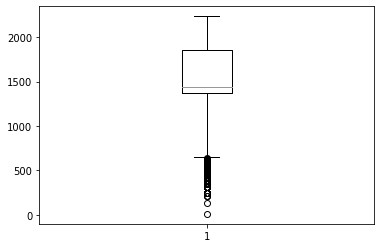

In [15]:
# Let's visualize the matchDuration column - 

print("Mean ", data['matchDuration'].mean())
print("Median ", data['matchDuration'].median())
print("Minimum value ", data['matchDuration'].min())
print("Maximum value ", data['matchDuration'].max())

plt.boxplot(data['matchDuration'])
plt.show()

* __In matchDuration, we can see we have many values which are extremely low. These are called outliers. Boxplot helps to identify the outliers. And it also tells the mean, median, IQR.__

<AxesSubplot:xlabel='matchDuration', ylabel='Density'>

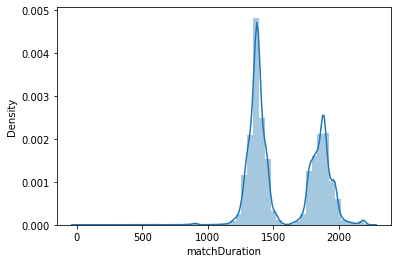

In [16]:
# We can see the distribution plot as well of matchDuration -

sns.distplot(data['matchDuration'])

<AxesSubplot:xlabel='walkDistance', ylabel='Density'>

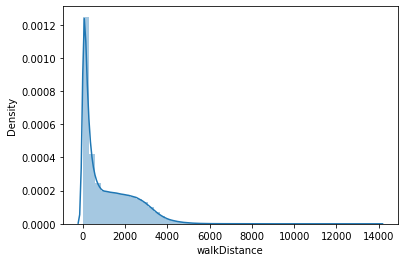

In [17]:
# We can see the distribution plot of walkDistance -

sns.distplot(data['walkDistance'])

<AxesSubplot:xlabel='rideDistance', ylabel='Density'>

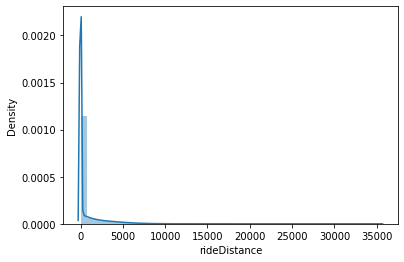

In [18]:
# We can see the distribution plot of rideDistance -

sns.distplot(data['rideDistance'])

<AxesSubplot:xlabel='swimDistance', ylabel='Density'>

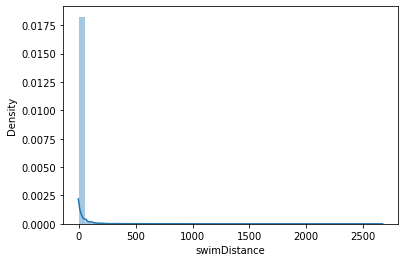

In [19]:
# We can see the distribution plot of swimDistance -

sns.distplot(data['swimDistance'])

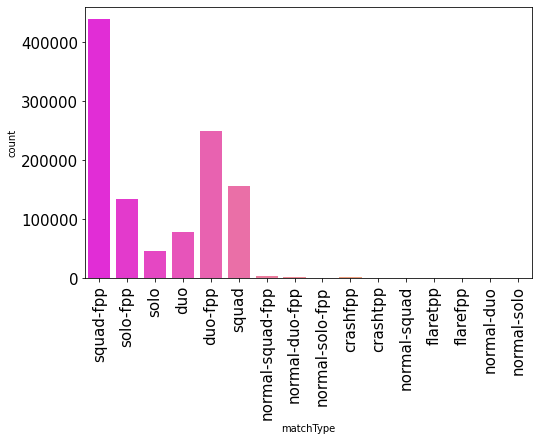

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(data['matchType'], data=data, palette='spring')
plt.xticks(fontsize=15)
plt.xticks(rotation=90)
plt.yticks(fontsize=15)
plt.show()

* __Most of the players play in squad-fpp__

<AxesSubplot:xlabel='kills', ylabel='count'>

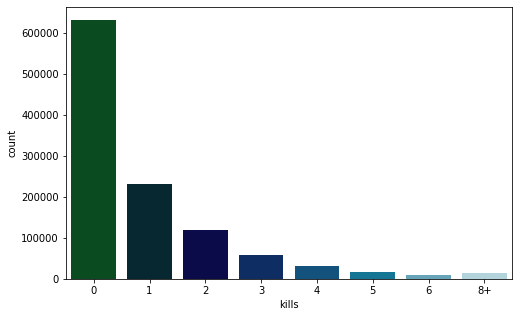

In [21]:
data1 = data.copy()
data1.loc[data1['kills'] > data1['kills'].quantile(0.98)] = '8+'
plt.figure(figsize=(8,5))
sns.countplot(data1['kills'].astype('str').sort_values(), data=data1, palette='ocean')

* __The count of 0 kills are very high and as kills are increasing the count is decreasing.__

<AxesSubplot:xlabel='kills', ylabel='count'>

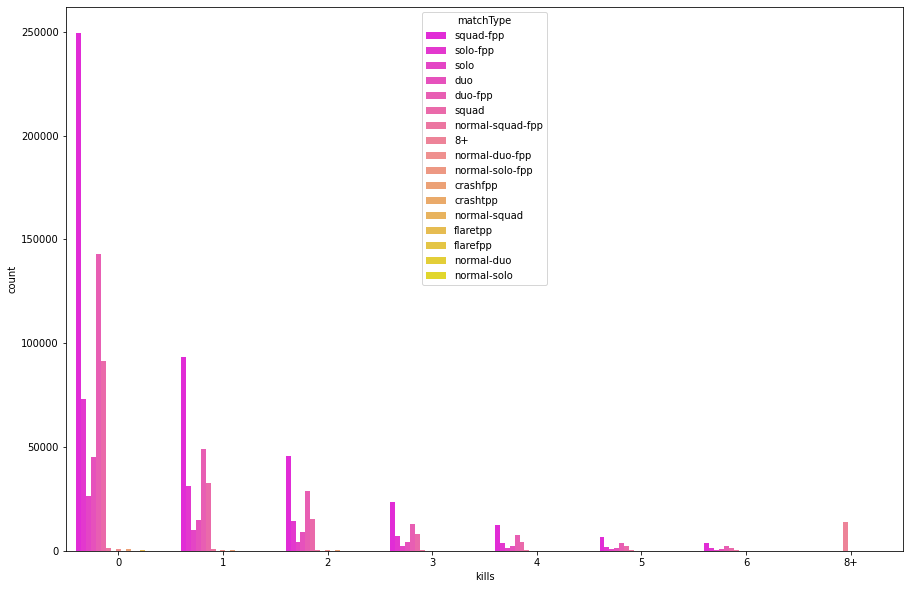

In [22]:
data1 = data.copy()
data1.loc[data1['kills'] > data1['kills'].quantile(0.98)] = '8+'
plt.figure(figsize=(15,10))
sns.countplot(data1['kills'].astype('str').sort_values(), data=data1, palette='spring', hue='matchType')

* __The players who are playing in squad-fpp are kiiling more enemies.__

<AxesSubplot:xlabel='killsCategories', ylabel='winPlacePerc'>

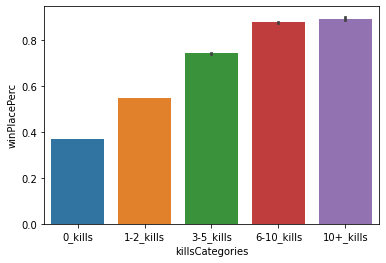

In [23]:
data2 = data.copy()
data2['killsCategories'] = pd.cut(data2['kills'], [-1, 0, 2, 5, 10, 60], 
                                  labels=['0_kills', '1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])

sns.barplot(x='killsCategories', y='winPlacePerc', data=data2)

* __The chances of winning is depending on kills. The higher number of kills, the higher probability of winning.__

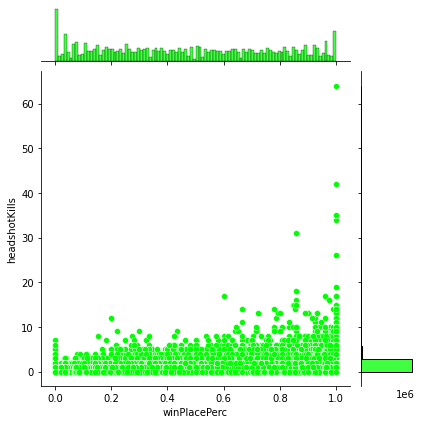

In [24]:
sns.jointplot(x='winPlacePerc', y='headshotKills', data=data, color='lime')

* __The chances of winning of those people are high who are killing enemies by headshot.__

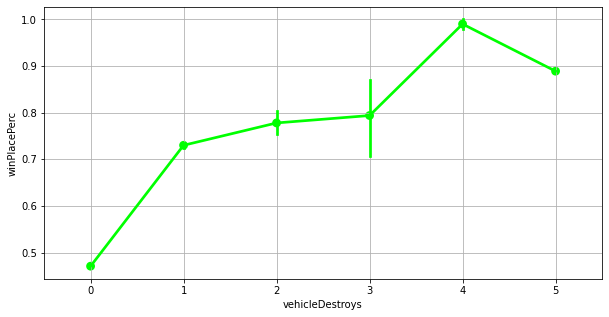

In [25]:
plt.subplots(figsize=(10,5))
sns.pointplot(x='vehicleDestroys', y='winPlacePerc', data=data, color='lime', alpha=0.7)
plt.grid()
plt.show()

* __The chances of winning are higher when people are destroying vechiles.__

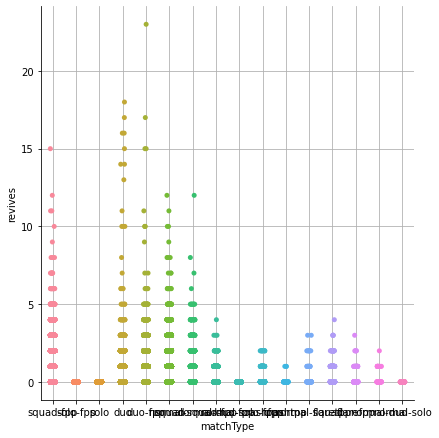

In [26]:
sns.catplot(x="matchType", y="revives", data=data, height=6)
plt.grid()
plt.show()

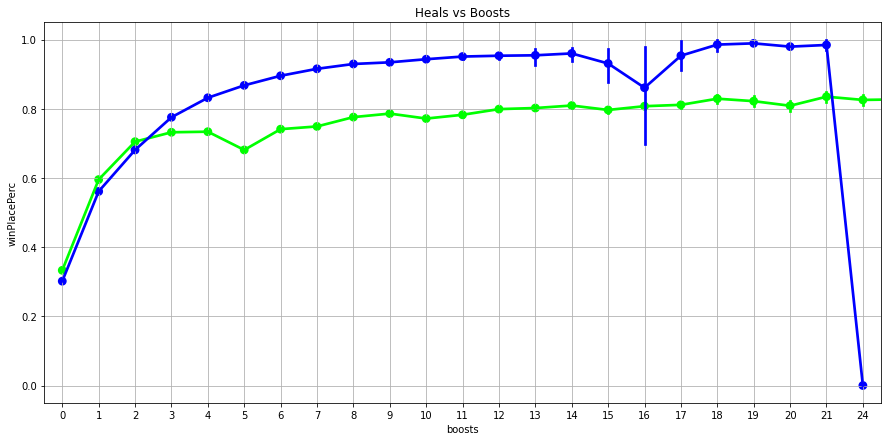

In [27]:
data3 = data.copy()
data3 = data3[data['heals'] < data['heals'].quantile(0.99)]
data3 = data3[data['boosts'] < data['boosts'].quantile(0.99)]

plt.subplots(figsize=(15,7))
sns.pointplot(x='heals', y='winPlacePerc', data=data, color='lime', alpha=0.7)
sns.pointplot(x='boosts', y='winPlacePerc', data=data, color='blue', alpha=0.7)
plt.title('Heals vs Boosts')
plt.grid()
plt.show()

* __The number of winning percentage are high for heals as compare to boosts.__

KeyboardInterrupt: 

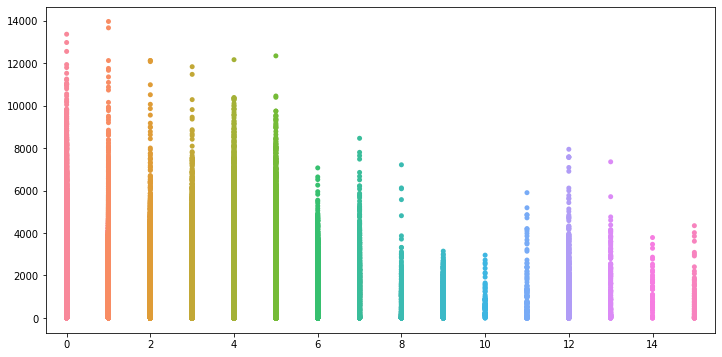

In [28]:
plt.figure(figsize=(12,6))
sns.swarmplot(x='matchType',y='walkDistance',data=data)

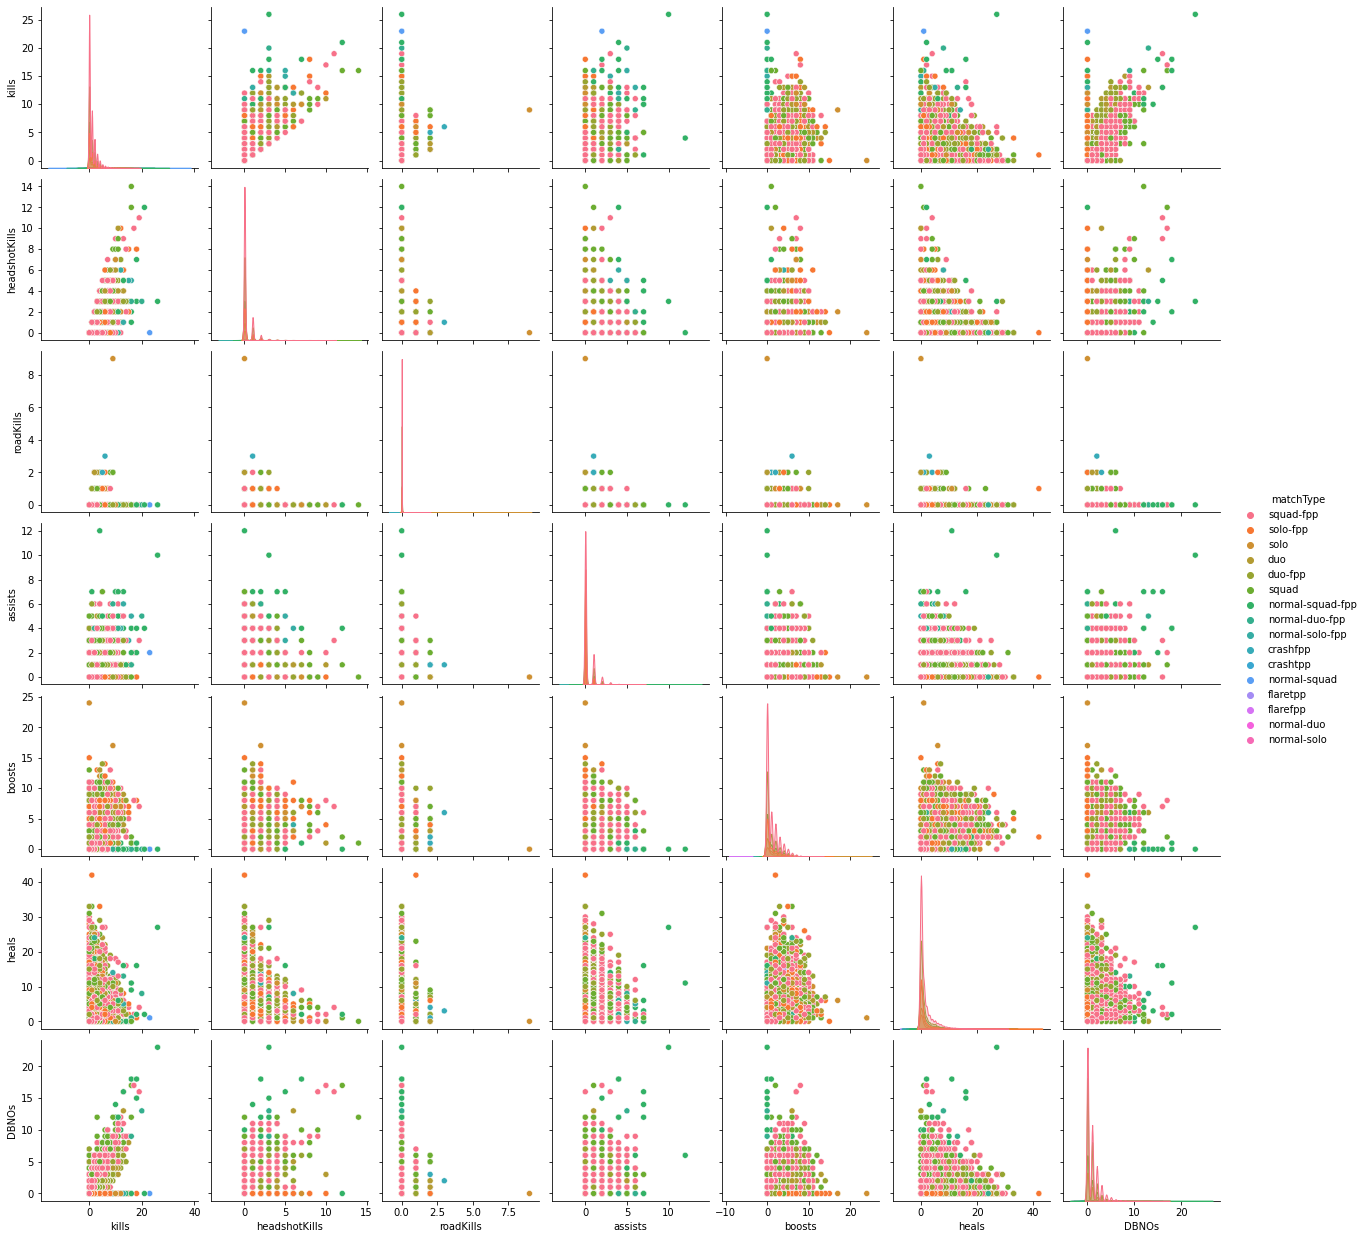

In [29]:
data1 = data[['kills', 'headshotKills', 'roadKills', 'assists', 'boosts', 'heals', 'DBNOs', 'matchType']]
sns.pairplot(data1[:50000], hue='matchType')

In [30]:
corr = data.drop(['Unnamed: 0'], axis=1).corr()
corr

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,1.000000,0.306582,0.409369,0.302200,0.199487,0.228456,-0.289984,0.038331,0.322068,0.243386,0.260407,-0.019399,-0.147629,-0.146552,-0.015586,0.197938,0.110496,0.012366,0.022871,0.007775,0.058241,0.288579,0.244595,0.023341,0.297738
boosts,0.306582,1.000000,0.519600,0.357903,0.331536,0.535388,-0.554046,0.008992,0.499478,0.403484,0.421444,0.071471,-0.013297,-0.012529,0.022659,0.254125,0.329281,0.033775,0.107880,0.014645,0.085997,0.639361,0.405301,-0.006973,0.633482
damageDealt,0.409369,0.519600,1.000000,0.735084,0.613306,0.341620,-0.676134,0.050217,0.889038,0.703222,0.561656,-0.007605,-0.041203,-0.040570,-0.001615,0.256318,0.139840,0.050660,0.037509,0.016209,0.079901,0.396621,0.354515,0.017990,0.438973
DBNOs,0.302200,0.357903,0.735084,1.000000,0.467393,0.265348,-0.554858,0.042139,0.706211,0.646344,0.449521,-0.014080,-0.267302,-0.265376,-0.002738,0.301098,0.101882,0.035705,0.018726,0.071295,0.059857,0.284051,0.217667,0.010483,0.279322
headshotKills,0.199487,0.331536,0.613306,0.467393,1.000000,0.197936,-0.468079,0.024203,0.673739,0.513207,0.444803,-0.018887,0.008062,0.008236,0.005047,0.149131,0.076275,0.011974,0.029988,0.009198,0.039857,0.249591,0.215613,0.005029,0.276170
heals,0.228456,0.535388,0.341620,0.265348,0.197936,1.000000,-0.385497,-0.001990,0.310537,0.268948,0.262337,0.107887,-0.064126,-0.063573,0.018507,0.236400,0.297734,0.023416,0.080991,0.035847,0.062720,0.429283,0.308229,-0.010303,0.427296
killPlace,-0.289984,-0.554046,-0.676134,-0.554858,-0.468079,-0.385497,1.000000,-0.023594,-0.728966,-0.809669,-0.539512,-0.004880,0.015852,0.017793,-0.014800,-0.270056,-0.236371,-0.057496,-0.089924,-0.039589,-0.072698,-0.590130,-0.489741,-0.002611,-0.719051
killPoints,0.038331,0.008992,0.050217,0.042139,0.024203,-0.001990,-0.023594,1.000000,0.036511,0.037883,0.013884,-0.098793,-0.044096,-0.041699,-0.975461,0.012730,-0.027882,-0.004503,-0.005820,-0.039932,-0.009321,0.004883,-0.004246,0.983443,0.013089
kills,0.322068,0.499478,0.889038,0.706211,0.673739,0.310537,-0.728966,0.036511,1.000000,0.802054,0.600461,-0.031480,-0.005441,-0.004644,0.007880,0.253223,0.114665,0.061824,0.039986,0.019248,0.078644,0.373495,0.338190,0.007204,0.418527
killStreaks,0.243386,0.403484,0.703222,0.646344,0.513207,0.268948,-0.809669,0.037883,0.802054,1.000000,0.512811,-0.035353,-0.037211,-0.035946,0.002853,0.241888,0.098000,0.065413,0.034264,0.030051,0.062697,0.326998,0.275111,0.009182,0.376840


* __Correlation between all the features. Correlation tells us how much variables are dependent or independent to each other. The value of correlation is between -1 to +1. Let's try to visualize this -__

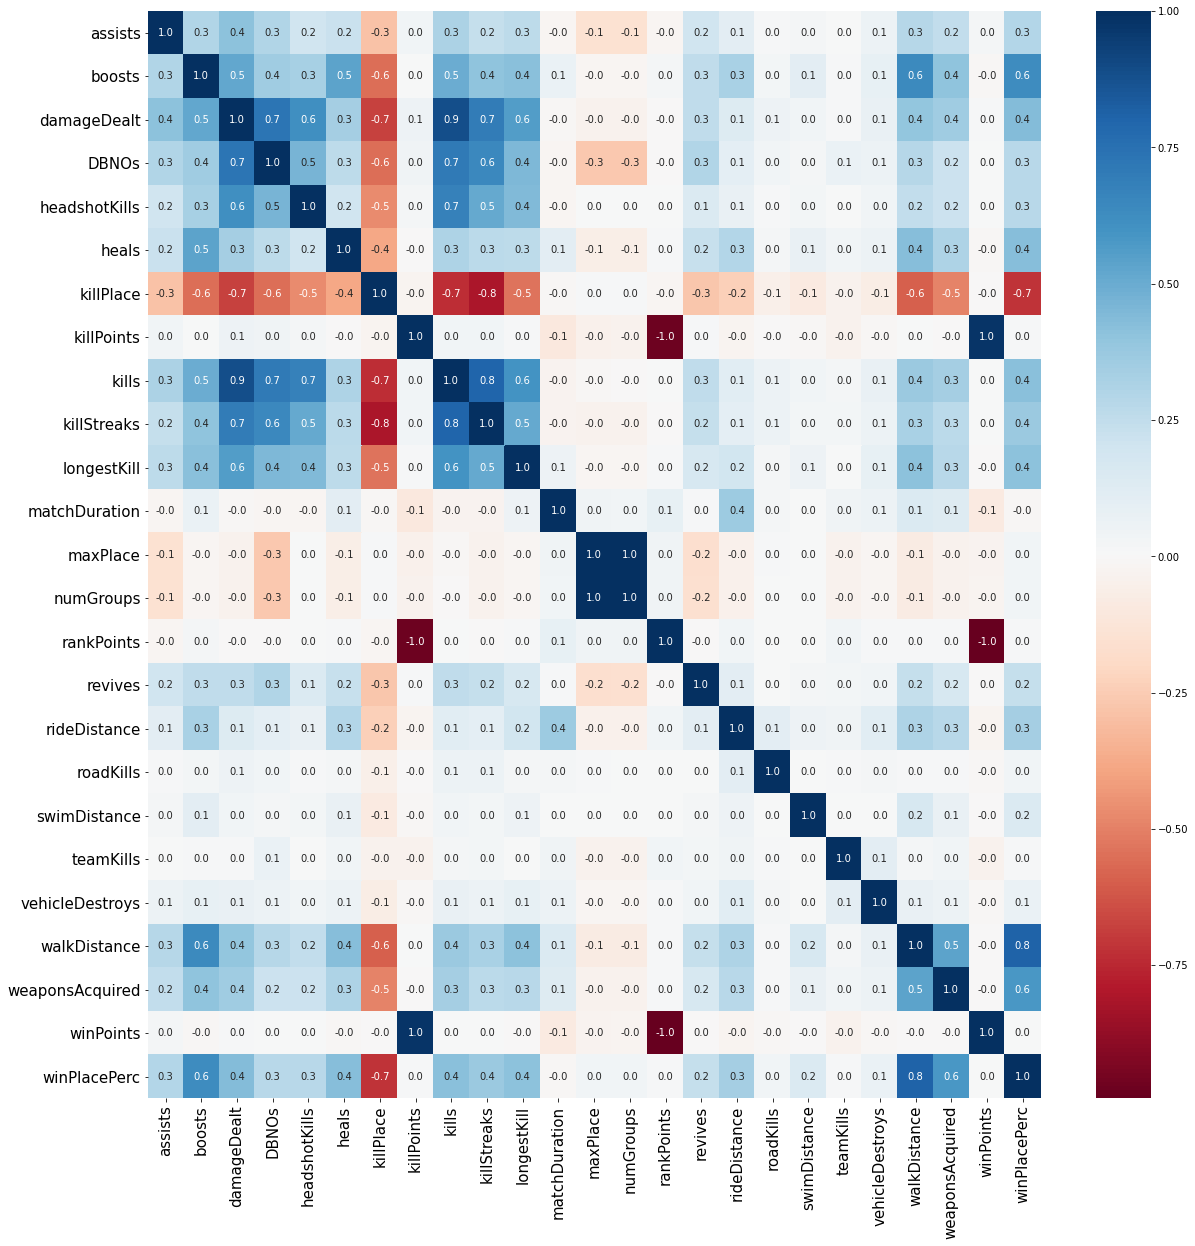

In [31]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, fmt='.1f', cmap='RdBu')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

* __As we can see that kills and damageDealt, killPlace and killStreaks are highly dependent to eachother. Where we are getting 0.0 or near 0 values, those features are independent to eachother__

<h3>Research Question -</h3> 

__If any player plays in squad-fpp and kills more than 4 enemies, he has the 60% chances of winning.__

We will verify this using hypothesis testing.
so, in this case - 

**Step1 -** Alternative hypothesis - $$ H_1: > \ 0.6 $$ 
> Null hypothesis - $$ H_0: <= \ 0.6 $$ 

**Step2 -** Collect sample of size 100 and then compute mean

**Step3 -** Compute test statistic: $$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

**Step4 -** Decide $ \alpha $

**Step5 -** Reject or accept based on Tailed test or P value

In [3]:
# z_score for sampling distributions

def z_score(sample_size, sample_mean, pop_mean, pop_std):
    numerator = sample_mean - pop_mean
    denomenator = pop_std / sample_size**0.5
    return numerator / denomenator

In [4]:
data['matchType'].unique()

array(['squad-fpp', 'solo-fpp', 'solo', 'duo', 'duo-fpp', 'squad',
       'normal-squad-fpp', 'normal-duo-fpp', 'normal-solo-fpp',
       'crashfpp', 'crashtpp', 'normal-squad', 'flaretpp', 'flarefpp',
       'normal-duo', 'normal-solo'], dtype=object)

In [5]:
data1 = data[(data['matchType']=='squad-fpp') & (data['kills']>=4)]
data2 = data1[['winPlacePerc']]

In [6]:
data2.shape[0]

27250

In [7]:
samples = random.sample(range(0, data2.shape[0]), 100)
sample_mean = data2.iloc[samples, 0].mean()
print(sample_mean)

0.7749819999999998


In [8]:
std = data2['winPlacePerc'].std()
print(std)

0.2142629248974136


In [9]:
# Right Tail - Calculating the z-critical value

confidence_level = 0.90
alpha = 1 - confidence_level
z_critical = norm.ppf(1 - alpha) # Left tailed Z score for 90% Confidence Level

print(z_critical)

1.2815515655446004


In [10]:
# Defining the sample and population parameters

sample_size = 100
sample_mean = sample_mean
pop_mean = data2['winPlacePerc'].mean()
pop_std = std
print(pop_mean)

0.8008845394495413


In [11]:
# Calculating the z-score

z = z_score(sample_size, sample_mean, pop_mean, pop_std)
print(z)

-1.2089137428672398


Text(0.7749819999999998, 0.0007, 'x_bar')

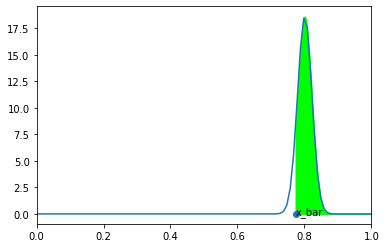

In [12]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 0
x_max = 1


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = pop_std / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the right critical value (right tailed Test)
z_critical_right = pop_mean - (z_critical * std)


# Shading the right rejection region
x2 = np.linspace(z_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='lime')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))

In [13]:
# Conclusion using z test

if(np.abs(z) > z_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [14]:
# Conclusion using p test

p_value = 2 * (1.0 - norm.cdf(np.abs(z)))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.2266959857764359
Fail to reject Null Hypothesis


***Research Conclusion -*** After hypothesis testing we can see that people who are playing in squad-fpp and killing more than 4 enemies don't have the 60% chances of winning. 

<h3>Step - 7: Final Conclusion</h3>

After EDA on PUBG Dataset we reach to these points -
> * Most of the players play in squad-fpp
> * The count of 0 kills are very high and as kills are increasing the count is decreasing
> * The players who are playing in squad-fpp are kiiling more enemies
> * and many more...

So, EDA very help us in analysing the data. We can conclude many points and after observations we can easily train our model with less complexity and in less time.

Thank you for reading till last😃😃😃.

Shivani Khandelwal